# 시나리오
- 길이가 많이 긴(50cm) 농어의 무게를 예측하는 경우
- 50cm의 농어의 무게가 1033g이라고 예측
- 실제 농어의 무게가 훨씬 큰 상황이 발생
- 예측과 실제의 차이가 너무 큰 경우가 발생함

In [2]:
# k-최근접 이웃 모델의 한계

# 데이터 준비
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

# 훈련 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

# 훈련 데이터셋을 2차원으로 변경
train_input = train_input.reshape(-1, 1) # -1이라 하면 나머지 원소의 개수를 사용
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

# KNeighborsRegressor 임포트
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor 인스턴스 생성
knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

# 평가 점수 확인
knr.score(test_input, test_target)

(42,) (14,)
(42, 1) (14, 1)


0.9746459963987609

#### 50cm의 농어의 무게 예측

In [3]:
knr.predict([[50]])

array([1033.33333333])

#### 산점도로 시각화

[[6. 7. 7.]] [[34  8 14]]


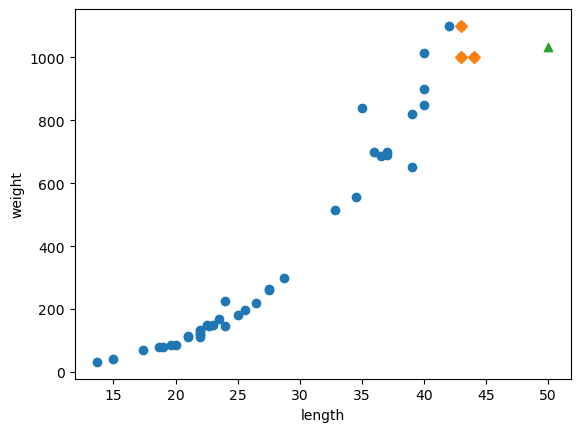

In [4]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 확인
distances, indexes = knr.kneighbors([[50]])
print(distances, indexes)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 이웃 샘플의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


##### 해석
- 길이가 커질수록 무게가 증가하는 경향이 보임(당연)
- 50cm에 가까운 이웃이 40~45cm부근이므로 이 샘플들의 무게로 예측함
- k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타겟을 평균으로 구하므로 예측하려는 샘플이 훈련 데이터의 범위를 벗어나면 엉뚱하게 예측할 수 있음  
ex) 100cm의 농어의 무게는?

In [6]:
# 100cm의 농어의 무게는?
knr.predict([[100]])

array([1033.33333333])

[[56. 57. 57.]] [[34  8 14]]


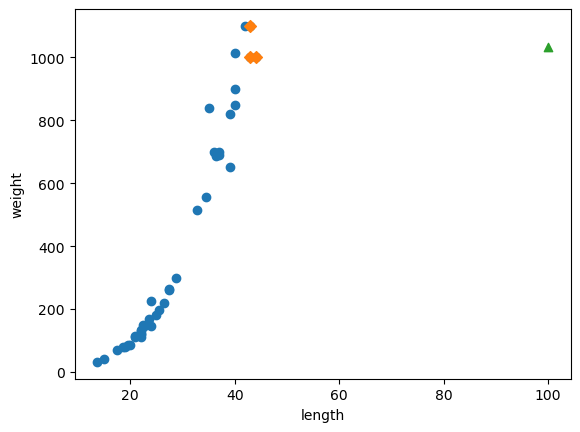

In [7]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 확인
distances, indexes = knr.kneighbors([[100]])
print(distances, indexes)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 해석
- 농어가 크더라도 이웃의 무게만으로 예측되어짐
- 이를 해결하기 위해서 K-최근접 이웃 알고리즘은 알맞지 않아보임

# 선형회귀(Linear Regression)

- 많이 사용되는 회귀 알고리즘
- 비교적 간단하고 성능이 좋은 편
- 특성이 하나인 경우 데이터를 잘 설명하는 직선을 찾는 알고리즘
- 선형 회귀 방정식 : $y = ax + b$  
    - a는 기울기, weight, w, 계수, coef 다 같은 의미
    - b는 절편(intercpet_)
    - $y = Wx + b$ (머신러닝에서는 수식을 이렇게 사용하기도 함)
    - $농어무게 = W \times 농어길이 + b$
        
        
- 농어의 무게 산점도가 있다고 하자
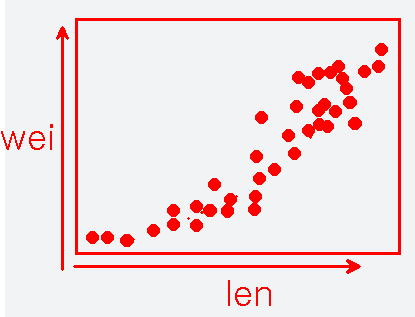

- 다음 그래프에서 어떤 직선이 가장 농어를 잘 설명하는가?
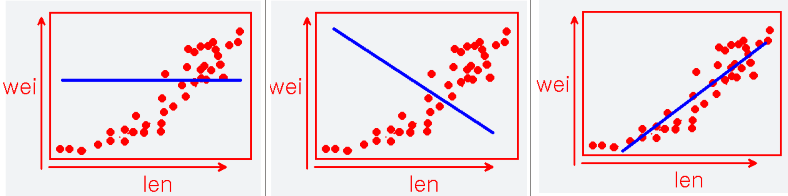
- 첫 번째 그래프:   
    모든 농어의 무게를 하나로 예측함  
    직선이 훈련세트의 평균에 가깝다면 $R^2$는 0에 가까운 값이 됨  


- 두 번째 그래프:  
    반대로 예측함
    길이가 작은 농어가 무겁고 길이가 큰 농어가 가벼움


- 세 번째 그래프:  
    가장 좋은 형태의 직선


### 준비된 데이터를 이용하여 선형회귀 모델 사용

In [8]:
# 선형 회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 객체 생성
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [9]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [10]:
# 계수, 기울기, 가중치, coef라고 불리는 a(coefficient)와 절편 b(intercept_)
# 가중치는 계수와 절편 모두를 의미하기도 함
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- k-최근접 이웃은 모델 파라미터가 없음(사례기반학습)
- coefficient, weight는 머신러닝 알고리즘이 찾은 값(모델 파라미터)
- coefficient: 기울기, weight: 절편
- 선형회귀는 모델기반학습

In [11]:
a = lr.coef_ # 가중치 W
b = lr.intercept_ # 절편 b

In [12]:
15*a+b, 50*a+b

(array([-123.7614705]), array([1241.83860323]))

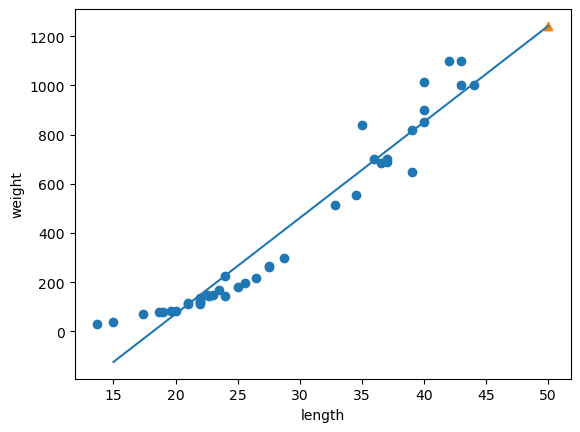

In [13]:
# 훈련 세트의 산점도 확인
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
# 기울기와 절편으로 계산한 두 점을 이으면 됨
plt.plot([15, 50], [15 * a + b, 50 * a + b])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 결과 해석
- 위 직선이 선형회귀 알고리즘으로 데이터셋에서 찾아낸 최적의 직선
- 이 직선을 이용하여 값을 예측
- 예측할 데이터가 훈련데이터셋의 범위를 벗어나더라도 이 직선으로 설명(예측)이 가능 

##### 모델 평가 점수($R^2$) 확인(과대적합/과소적합 확인)

In [36]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


##### 문제점
- 훈련데이터셋의 평가점수와 테스트데이터셋 평가점수가 차이가 남
- KNN에 비해서 상대적으로 판단하면 전체적으로 과소적합이라고 보여짐
- 점수
- 그래프를 보면 농어의 무게가 음수(-)로 설명될 수도 있음
- 직선으로 설명하기에 농어의 길이에 따른 무게는 조금 차이가 보여짐

# 다항회귀
- 데이터를 설명하는 변수가 2개 이상인 회귀 분석
- 직선이 아닌 곡선을 찾을 수 있음
- 다항식을 활용
- $y = (a_1x_1) + (a_2x_2) ... + b$
- $무게 = (a_1 \times 길이_1^2) + (a_2 \times 길이_2) + b$

In [14]:
train_input ** 2, train_input

(array([[ 384.16],
        [ 484.  ],
        [ 349.69],
        [ 302.76],
        [1296.  ],
        [ 625.  ],
        [1600.  ],
        [1521.  ],
        [1849.  ],
        [ 484.  ],
        [ 400.  ],
        [ 484.  ],
        [ 576.  ],
        [ 756.25],
        [1849.  ],
        [1600.  ],
        [ 576.  ],
        [ 441.  ],
        [ 756.25],
        [1600.  ],
        [1075.84],
        [ 702.25],
        [1332.25],
        [ 187.69],
        [ 515.29],
        [ 225.  ],
        [1369.  ],
        [1225.  ],
        [ 823.69],
        [ 552.25],
        [1521.  ],
        [ 441.  ],
        [ 529.  ],
        [ 484.  ],
        [1936.  ],
        [ 506.25],
        [ 361.  ],
        [1369.  ],
        [ 484.  ],
        [ 655.36],
        [1764.  ],
        [1190.25]]),
 array([[19.6],
        [22. ],
        [18.7],
        [17.4],
        [36. ],
        [25. ],
        [40. ],
        [39. ],
        [43. ],
        [22. ],
        [20. ],
        [22. ],
        

In [15]:
# 여기서는 농어의 길이를 제곱한 값을 두 번째 변수로 설정
# 넘파이 브로드캐스트 활용
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [16]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [17]:
# 데이터셋 형태 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [18]:
# 길이제곱이 추가된 데이터셋으로 모델 학습, 평가 및 예측

# 새로운 회귀모델 생성
lr = LinearRegression()

# 학습
lr.fit(train_poly, train_target)

# 결정계수와 가중치 확인
print(lr.coef_, lr.intercept_)

# 예측하기
print(lr.predict([[50**2, 50]]))

[  1.01433211 -21.55792498] 116.05021078278338
[1573.98423528]


##### 결과 해석
- $무게 = (1.01433211 \times 길이_1^2) + (-21.55792498 \times 길이_2) + 116.05021078278259$

In [19]:
# 직접 계산해보기
a1 = lr.coef_[0]
a2 = lr.coef_[1]
b = lr.intercept_

y = (a1 * 50**2) + (a2 * 50) + b
y

1573.9842352827404

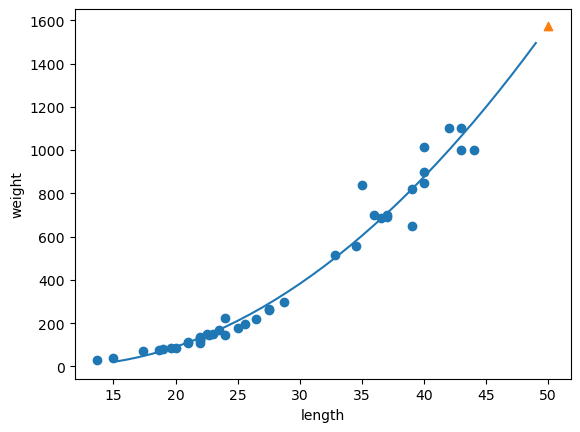

In [20]:
# 산점도 그리기

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, (a1*point**2) + (a2*point) + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 평가 점수($R^2$) 확인

In [21]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


##### 결과 해석
- 단순 선형회귀보다 데이터를 더 잘 설명하는 라인을 찾음
- 평가점수가 모두 높아짐
- 테스트데이터의 평가점수가 조금 더 높으므로 약간의 과소적합이라 할 수 있음
- 과소적합을 해소하기 위해 모델을 조금 더 복잡하게 만들어야 함

## 키워드 정리
### 선형회귀
- 특성과 타겟의 관계를 가장 잘 설명하는 선형 방정식을 찾는 것
- 특성이 하나라면 직선이 됨(단순 선형 회귀)
- 선형회귀로 찾은 특성과 타겟 사이의 관계는 coefficient, intercept에 저장됨

### 모델 파라미터(Model Parameters)
- 머신러닝 모델이 학습을 통해 찾아낸 값
- 이 값을 조정할 수 있는 함수의 파라미터를 조절하는 것을 하이퍼파라미터 튜닝이라 함

### 다항회귀
- 두 개 이상의 특성을 이용하여 회귀분석을 하는 것
- 비선형일 수 있으나 선형으로 표현가능